# Intento de reporte

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

In [2]:
# Step 1: Set the path to the folder containing your files
folder_path = '../factored-datathon-2023-data-science-rockstars/final_ahora_si_talvez/Agrupado'

# Step 2: List all the files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dfs = []

# Step 3: Read each file into a DataFrame and store in the list
for file_name in file_list:
    if file_name.endswith('.gzip'):  # Replace '.csv' with the appropriate file extension
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_parquet(file_path, engine='fastparquet')  # Use the appropriate read function for your file type
        dfs.append(df)

# Step 4: Concatenate the DataFrames into a single one
concatenated_df = pd.concat(dfs, ignore_index=True)
concatenated_df = concatenated_df.query('overall != 0')
# Now, 'concatenated_df' contains all the data from the files in a single DataFrame.


In [53]:
# Step 1: Set the path to the folder containing your files
folder_path = '../factored-datathon-2023-data-science-rockstars/final_ahora_si_talvez/Games'

# Step 2: List all the files in the folder
file_list = os.listdir(folder_path)

# Initialize an empty list to store DataFrames
dfs = []

# Step 3: Read each file into a DataFrame and store in the list
for file_name in file_list:
    if file_name.endswith('.gzip'):  # Replace '.csv' with the appropriate file extension
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_parquet(file_path, engine='fastparquet')  # Use the appropriate read function for your file type
        dfs.append(df)

# Step 4: Concatenate the DataFrames into a single one
df_games = pd.concat(dfs, ignore_index=True)
df_games = df_games.query('overall != 0')
# Now, 'concatenated_df' contains all the data from the files in a single DataFrame.


In [3]:
concatenated_df['Year'] = concatenated_df['YearMonth'].astype(str).str[:4].astype('int16')
concatenated_df['Month'] = concatenated_df['YearMonth'].astype(str).str[4:].astype('int16')

In [4]:
df_trend = concatenated_df.groupby(['Year', 'Month', 'overall']).agg({'total_count':'sum', 'distinct_count':'sum', 'votes_sum':'sum'}).sort_values(by=['Year', 'Month', 'overall']).reset_index()
df_trend['Year-Month'] = concatenated_df['Year'].astype(str) + '-' + concatenated_df['Month'].astype(str)
df_trend['frequent_reviewers_percentage'] = (1 - np.divide(df_trend['distinct_count'], df_trend['total_count']))*100

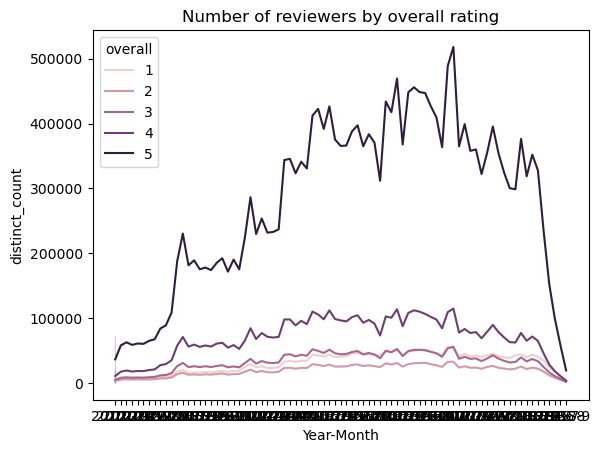

In [5]:
sns.lineplot(data= df_trend, x='Year-Month', y ='distinct_count', hue='overall')
plt.title('Number of reviewers by overall rating')
plt.show()

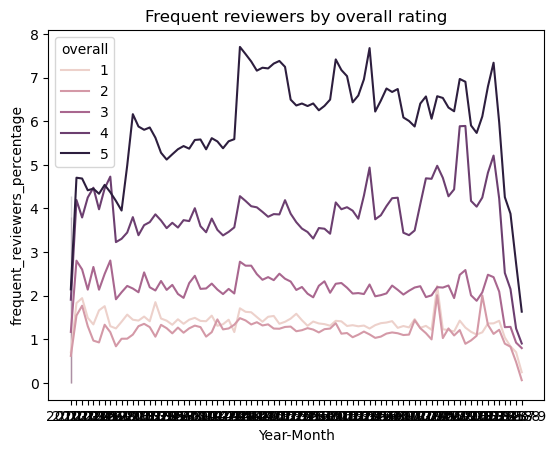

In [6]:
sns.lineplot(data= df_trend, x='Year-Month', y ='frequent_reviewers_percentage', hue='overall')
plt.title('Percentage of frequent reviewers by overall rating')
plt.show()

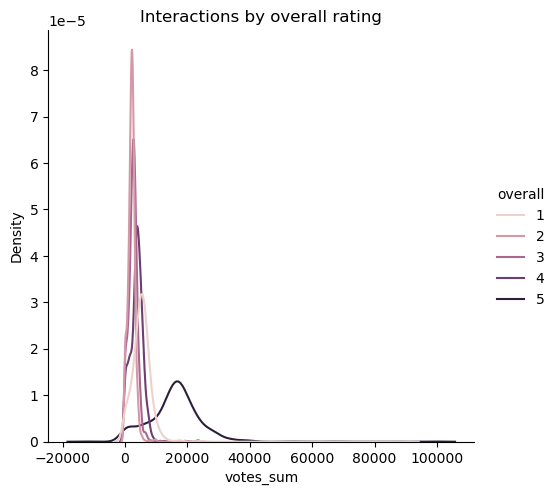

In [7]:
sns.displot(data=concatenated_df, x='votes_sum', hue='overall', kind='kde')
plt.title('Interactions by overall rating')
plt.show()

Text(0.5, 1.1, 'Frequent Reviewers and number of interactions')

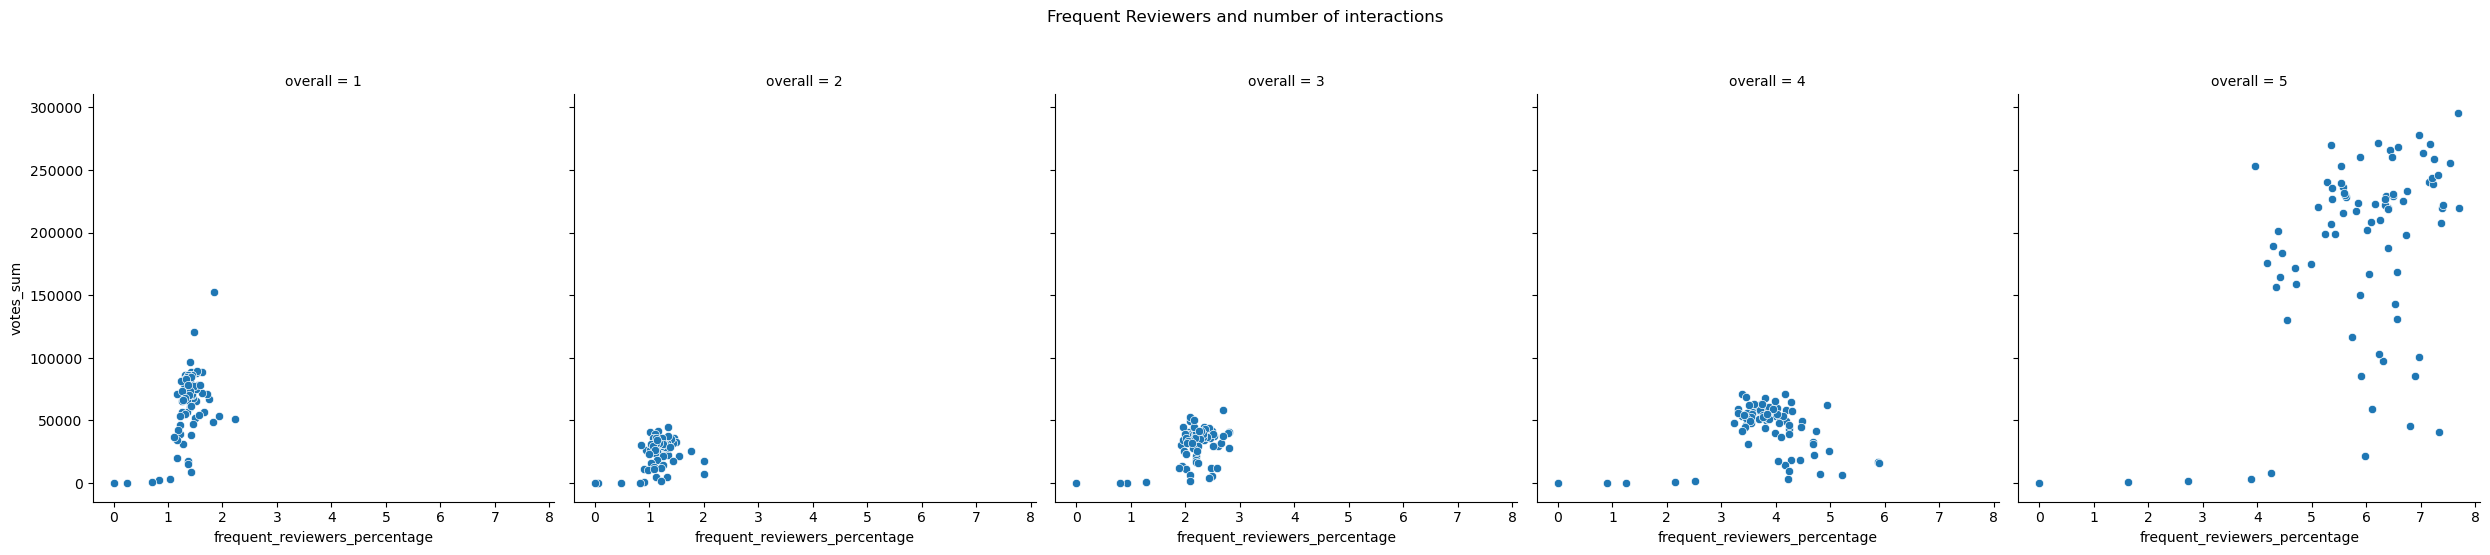

In [15]:
rel = sns.relplot(data=df_trend, x='frequent_reviewers_percentage', y='votes_sum', kind='scatter', col='overall')
rel.fig.suptitle('Frequent Reviewers and number of interactions', y=1.1)

<Axes: >

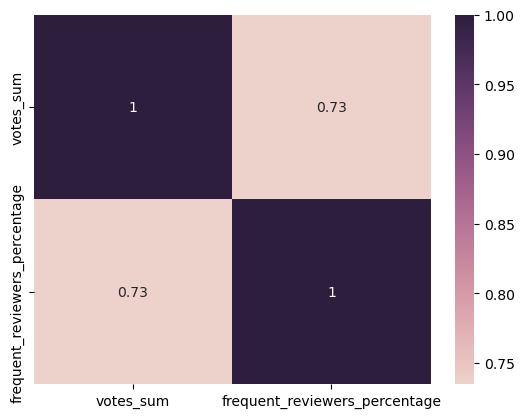

In [26]:
sns.heatmap(df_trend[['votes_sum','frequent_reviewers_percentage']].corr(), label=True, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

### Games

In [43]:
games = {
    'style': [
        '{"Format":"Video Game"}',
        '{"Platform":"PlayStation2"}',
        '{"Platform":"GameCube"}',
        '{"Edition":"Standard","Platform":"PC"}',
        '{"Platform":"PC"}',
        '{"Platform":"PC Download"}',
        '{"Platform":"Xbox"}',
        '{"Edition":"Standard","Platform":"Mac"}',
        '{"Edition":"Game of the Year","Platform":"PC"}'
    ]
}

In [74]:
filtered_df = df_games[df_games['style'].str.contains('Video Game|PC|Xbox|PlayStation|Mac', regex=True)]



In [75]:
filtered_df['style'].unique()

array(['{"Format:":" Video Game"}', '{"Platform:":" PC Download"}',
       '{"Platform:":" PC"}',
       '{"Edition:":" Standard","Platform:":" PC"}',
       '{"Edition:":" Standard","Platform:":" Mac"}',
       '{"Platform:":" PlayStation2"}', '{"Platform:":" Xbox"}',
       '{"Edition:":" Game of the Year","Platform:":" PC"}',
       '{"Color:":" NES Video Game Controller"}',
       '{"Platform:":" PlayStation 4"}', '{"Platform:":" PC/Mac"}',
       '{"Platform:":" PC Disc"}',
       '{"Format:":" Box","Platform:":" PC Disc"}',
       '{"Format:":" Thin Software Download","Platform:":" PC Download"}',
       '{"Color:":" Video Game Control"}', '{"Platform:":" PC/Mac Disc"}',
       '{"Format:":" Box","Platform:":" PC/Mac Disc"}',
       '{"Platform:":" Mac Disc"}', '{"Platform:":" PC Key Card"}',
       '{"Format:":" Box","Platform:":" Mac Disc"}',
       '{"Platform:":" Mac Download"}',
       '{"Format:":" Thin Software Download","Platform:":" Mac Download"}',
       '{"Format:":" 